In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D,Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(),y_test.flatten()

print ("Features shape: {}".format(x_train.shape))
print ("Labels shape : {}".format(y_train.shape))

Features shape: (50000, 32, 32, 3)
Labels shape : (50000,)


In [3]:
K = len(set(y_train))
print ("Total Classes: {}".format(K))

Total Classes: 10


In [4]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model = Model(i,x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 137s 3ms/sample - loss: 1.5745 - acc: 0.4238 - val_loss: 1.2639 - val_acc: 0.5447
Epoch 2/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 1.2782 - acc: 0.5414 - val_loss: 1.1367 - val_acc: 0.5919
Epoch 3/10
50000/50000 [==============================] - 144s 3ms/sample - loss: 1.1478 - acc: 0.5885 - val_loss: 1.0233 - val_acc: 0.6333
Epoch 4/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 1.0545 - acc: 0.6232 - val_loss: 1.0111 - val_acc: 0.6360
Epoch 5/10
50000/50000 [==============================] - 148s 3ms/sample - loss: 0.9800 - acc: 0.6508 - val_loss: 0.9313 - val_acc: 0.6720
Epoch 6/10
50000/50000 [==============================] - 146s 3ms/sample - loss: 0.9076 - acc: 0.6770 - val_loss: 0.8936 - val_acc: 0.6911
Epoch 7/10
50000/50000 [==============================] - 138s 3ms/sample - loss: 0.8591 - acc: 0.6938 - val_l

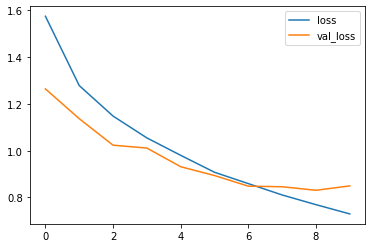

In [7]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

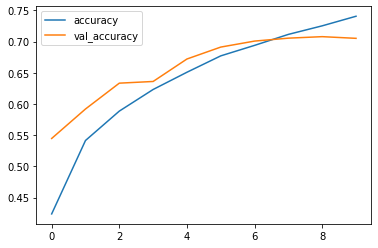

In [8]:
plt.plot(r.history['acc'],label='accuracy')
plt.plot(r.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

In [10]:
print (model.evaluate(x_test,y_test))

10000/10000 [==============================] - 7s 716us/sample - loss: 0.8494 - acc: 0.7051
[0.8493667572021485, 0.7051]


In [11]:
# Plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without normalization.")
    
    print (cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
                j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix, without normalization.
[[766  14  42   5  11   3   6  16 122  15]
 [ 21 831  11   3   0   1   7   7  46  73]
 [ 82   4 695  37  59  28  35  35  19   6]
 [ 38   6 132 445  82 145  66  48  27  11]
 [ 27   1 149  38 627  16  22  97  19   4]
 [ 19   5 109 158  58 522  21  80  20   8]
 [ 19  11  88  33  77  22 726   9  13   2]
 [ 21   1  45  18  43  27   7 827   6   5]
 [ 44  18  11   7   8   3   2   4 892  11]
 [ 52  96  15  12   7   7   9  24  58 720]]


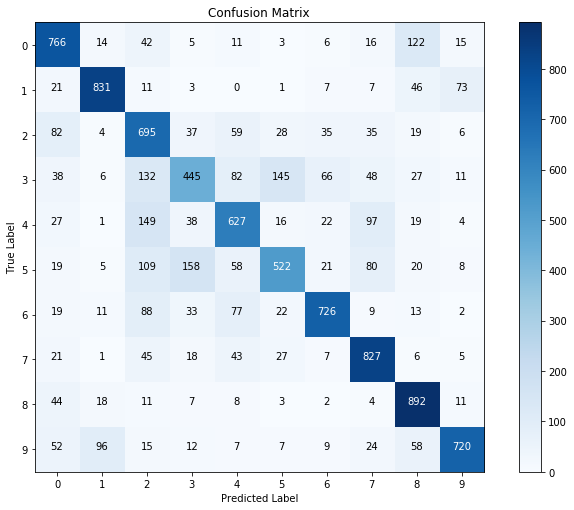

In [12]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)))

Normalized Confusion Matrix
[[0.766 0.014 0.042 0.005 0.011 0.003 0.006 0.016 0.122 0.015]
 [0.021 0.831 0.011 0.003 0.    0.001 0.007 0.007 0.046 0.073]
 [0.082 0.004 0.695 0.037 0.059 0.028 0.035 0.035 0.019 0.006]
 [0.038 0.006 0.132 0.445 0.082 0.145 0.066 0.048 0.027 0.011]
 [0.027 0.001 0.149 0.038 0.627 0.016 0.022 0.097 0.019 0.004]
 [0.019 0.005 0.109 0.158 0.058 0.522 0.021 0.08  0.02  0.008]
 [0.019 0.011 0.088 0.033 0.077 0.022 0.726 0.009 0.013 0.002]
 [0.021 0.001 0.045 0.018 0.043 0.027 0.007 0.827 0.006 0.005]
 [0.044 0.018 0.011 0.007 0.008 0.003 0.002 0.004 0.892 0.011]
 [0.052 0.096 0.015 0.012 0.007 0.007 0.009 0.024 0.058 0.72 ]]


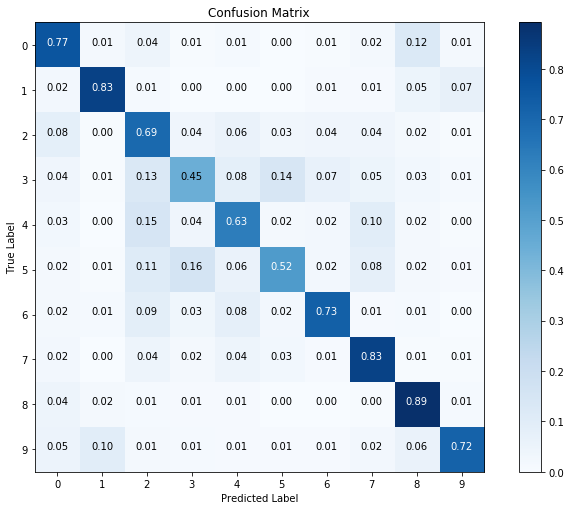

In [13]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)),True)